In [1]:
# Initializing the app
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('wtam186_Iteration4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/03 07:07:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Loading dataset
df = spark.read.csv('./Datasets/COVID-19 Survey Student Responses.csv', header='true')
df

DataFrame[ID: string, Region of residence: string, Age of Subject: string, Time spent on Online Class: string, Rating of Online Class experience: string, Medium for online class: string, Time spent on self study: string, Time spent on fitness: string, Time spent on sleep: string, Time spent on social media: string, Prefered social media platform: string, Time spent on TV: string, Number of meals per day: string, Change in your weight: string, Health issue during lockdown: string, Stress busters: string, Time utilized: string, Do you find yourself more connected with your family, close friends , relatives  ?: string, What you miss the most: string]

# Step 2.1: Initial Inspection on the dataset

In [3]:
# Understanding the data by showing the top 10 rows and displaying specific columns in a clear and tidy format (to avoid output being truncated)
df.select("ID", "Region of residence", "Age of Subject", "Time spent on Online Class", "Rating of Online Class experience").show(10)
df.select("Medium for online class", "Time spent on self study", "Time spent on fitness", "Time spent on sleep").show(10)
df.select("Time spent on social media", "Prefered social media platform", "Time spent on TV", "Number of meals per day").show(10)
df.select("Change in your weight", "Health issue during lockdown", "Stress busters", "Time utilized").show(10)
df.select("Do you find yourself more connected with your family, close friends , relatives  ?", "What you miss the most").show(10)


+---+-------------------+--------------+--------------------------+---------------------------------+
| ID|Region of residence|Age of Subject|Time spent on Online Class|Rating of Online Class experience|
+---+-------------------+--------------+--------------------------+---------------------------------+
| R1|          Delhi-NCR|            21|                         2|                             Good|
| R2|          Delhi-NCR|            21|                         0|                        Excellent|
| R3|          Delhi-NCR|            20|                         7|                        Very poor|
| R4|          Delhi-NCR|            20|                         3|                        Very poor|
| R5|          Delhi-NCR|            21|                         3|                             Good|
| R6|          Delhi-NCR|            21|                         0|                        Very poor|
| R7|          Delhi-NCR|            19|                         2|               

# Step 2.2 Describing the data

In [4]:
# Obtaining the data type of each column
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Region of residence: string (nullable = true)
 |-- Age of Subject: string (nullable = true)
 |-- Time spent on Online Class: string (nullable = true)
 |-- Rating of Online Class experience: string (nullable = true)
 |-- Medium for online class: string (nullable = true)
 |-- Time spent on self study: string (nullable = true)
 |-- Time spent on fitness: string (nullable = true)
 |-- Time spent on sleep: string (nullable = true)
 |-- Time spent on social media: string (nullable = true)
 |-- Prefered social media platform: string (nullable = true)
 |-- Time spent on TV: string (nullable = true)
 |-- Number of meals per day: string (nullable = true)
 |-- Change in your weight: string (nullable = true)
 |-- Health issue during lockdown: string (nullable = true)
 |-- Stress busters: string (nullable = true)
 |-- Time utilized: string (nullable = true)
 |-- Do you find yourself more connected with your family, close friends , relatives  ?: string (nu

In [5]:
df.count()

1182

In [6]:
len(df.columns)

19

# Step 2.3: Data exploration

In [7]:
!pip3 install seaborn
!pip3 install --upgrade pip
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement 

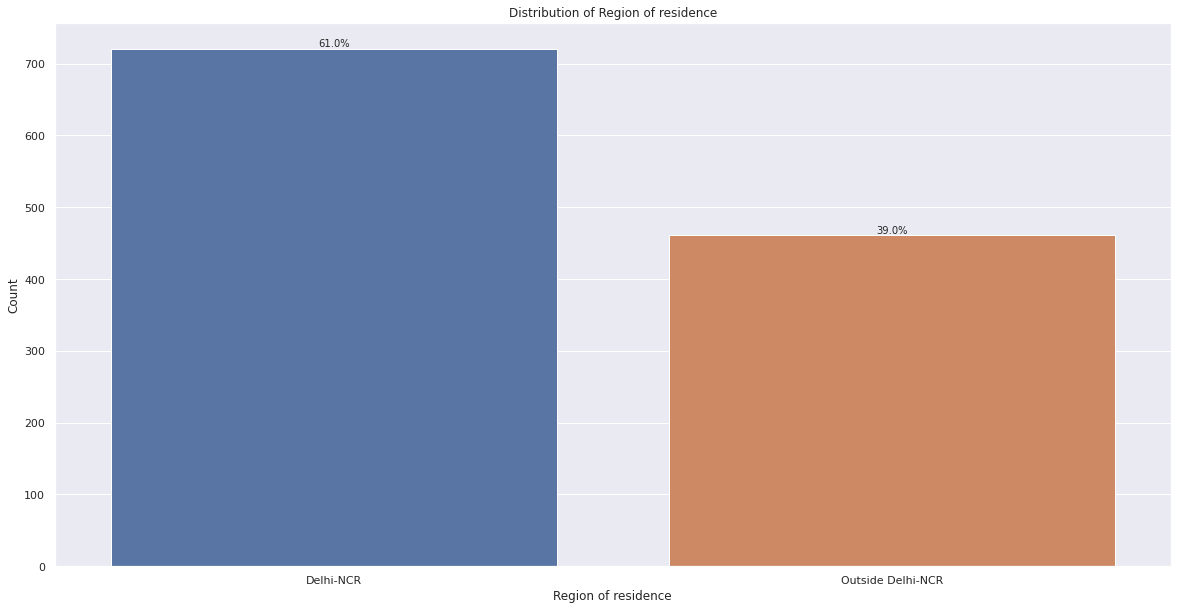

In [8]:
#PySpark doesn't provide as extensive plotting capabilities as Pandas and Matplotlib
#So could not use pyspark to create the histogram for the 'Region of residence' column
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot

dfpd=pd.read_csv('./Datasets/COVID-19 Survey Student Responses.csv')

sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Region of residence', data=dfpd)
# Calculate percentages
total = len(dfpd)
counts = dfpd['Region of residence'].value_counts()
percentages = counts / total * 100
# Annotate the bars with percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{percentages[i]:.1f}%',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom')
plt.xlabel('Region of residence')
plt.ylabel('Count')
plt.title('Distribution of Region of residence')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


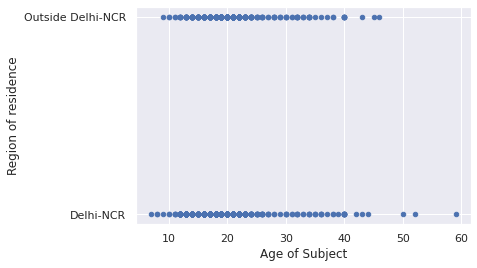

In [9]:
#PySpark doesn't provide as extensive plotting capabilities as Pandas and Matplotlib
#So could not use pyspark to create the scatter plot
dfpd.plot(kind='scatter', x='Age of Subject', y='Region of residence')
plt.show()

In [10]:
### Use pyspark to count both null and missing values
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+-------------------+--------------+--------------------------+---------------------------------+-----------------------+------------------------+---------------------+-------------------+--------------------------+------------------------------+----------------+-----------------------+---------------------+----------------------------+--------------+-------------+----------------------------------------------------------------------------------+----------------------+
| ID|Region of residence|Age of Subject|Time spent on Online Class|Rating of Online Class experience|Medium for online class|Time spent on self study|Time spent on fitness|Time spent on sleep|Time spent on social media|Prefered social media platform|Time spent on TV|Number of meals per day|Change in your weight|Health issue during lockdown|Stress busters|Time utilized|Do you find yourself more connected with your family, close friends , relatives  ?|What you miss the most|
+---+-------------------+--------------+----

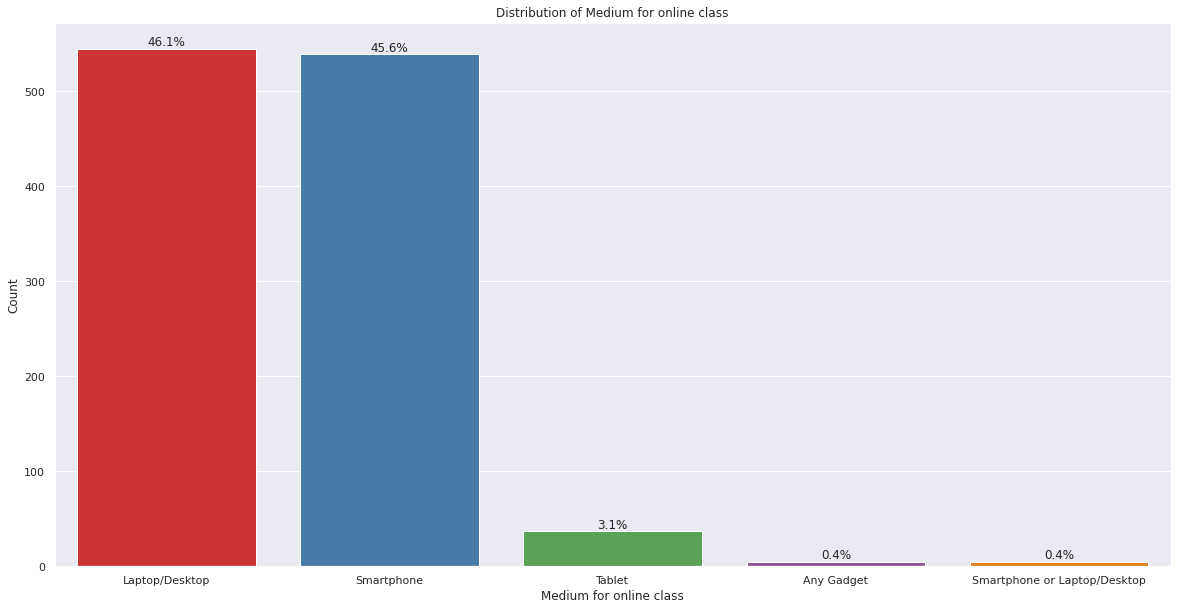

In [11]:
#PySpark doesn't provide as extensive plotting capabilities as Pandas and Matplotlib
#So could not use pyspark to create the bar chart
sns.set(style='darkgrid')
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Medium for online class', data=dfpd, palette='Set1') # Change the palette for visualization
# Calculate percentages
total = len(dfpd)
counts = dfpd['Medium for online class'].value_counts()
percentages = counts / total * 100
# Annotate the bars with percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{percentages[i]:.1f}%',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom')
plt.xlabel('Medium for online class')
plt.ylabel('Count')
plt.title('Distribution of Medium for online class')
plt.show()

In [12]:
#'df' is PySpark DataFrame

# Extract unique values from the 'Time spent on TV' column
unique_times = df.select('Time spent on TV').distinct()

# Count the occurrences of each unique value
time_counts = df.groupBy('Time spent on TV').agg(count('*').alias('count'))

# Collect the results and print them
print("Unique values of time spent on TV:")
unique_times.show(30)

print("\nCounts of each unique time:")
time_counts.show(30)

Unique values of time spent on TV:
+----------------+
|Time spent on TV|
+----------------+
|               7|
|            0.75|
|              15|
|             0.3|
|               3|
|               8|
|            0.25|
|             4.5|
|               0|
|             2.5|
|               5|
|               n|
|             3.5|
|               6|
|             0.5|
|             0.6|
|               N|
|             0.1|
|             1.5|
|               1|
|               4|
|                |
|           No tv|
|               2|
|             0.4|
+----------------+


Counts of each unique time:
+----------------+-----+
|Time spent on TV|count|
+----------------+-----+
|               7|    2|
|            0.75|    1|
|              15|    1|
|             0.3|   12|
|               3|   50|
|               8|    2|
|            0.25|    1|
|             4.5|    2|
|               0|  441|
|             2.5|    2|
|               5|   10|
|               n|    1|
|        

In [13]:
#'df' is PySpark DataFrame

# Extract unique values from the 'What you miss the most' column
unique_times = df.select('What you miss the most').distinct()

# Collect the results and print them
print("Unique values of What you miss the most:")
unique_times.show(80)

Unique values of What you miss the most:
+----------------------+
|What you miss the most|
+----------------------+
|  school, relatives...|
|  Eating outside an...|
|  Roaming around fr...|
|                   Job|
|                   ALL|
|  Friends,Romaing a...|
|  Travelling & Friends|
|              Nothing |
|            everything|
|               Family |
|     Previous mistakes|
|  Friends and roami...|
|        School/college|
|  Friends, relative...|
|  I have missed not...|
|   Taking kids to park|
|  Nah, this is my u...|
|    Badminton in court|
|               NOTHING|
|         All the above|
|                     .|
|              Internet|
|   Going to the movies|
|                Family|
|   School and friends.|
|               nothing|
|          Only friends|
|                   All|
|           Normal life|
|       To stay alone. |
|               Playing|
|            Colleagues|
|             All above|
|     All of the above |
|     My normal routine|
|  School

In [14]:
df2 = df.withColumn("Residential Region", when(df["Region of residence"] == "Delhi-NCR", 1).otherwise(0))

region = df2.select("Region of residence", "Residential Region")
region.show()

+-------------------+------------------+
|Region of residence|Residential Region|
+-------------------+------------------+
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|  Outside Delhi-NCR|                 0|
|          Delhi-NCR|                 1|
|  Outside Delhi-NCR|                 0|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|  Outside Delhi-NCR|                 0|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|  Outside Delhi-NCR|                 0|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
+-------------------+------------------+
only showing top

In [15]:
# Issues with installing sklearn (this is a python library and not pyspark)
# So we also installed sciki-learn
!pip3 install sklearn
!pip3 install --upgrade pip
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement 

In [16]:
dfpd2 = df2

In [17]:
#2.3.1. EXPLORING THE MOST IMPORTANT VARIABLES. Attempt 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

dropColumnsX1 = ["ID", "Region of residence", "Residential Region"]
X1 = dfpd2.drop(*dropColumnsX1)

dropColumnsy1 = ["ID", "Region of residence"]
y1 = dfpd2.select("Residential Region").drop(*dropColumnsy1)

#Produce and print scores for each categorical features in the data set
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X1, y1)
#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit.scores_[i]))
#Visualising the scores
#Get the indices sorted by most important to least important
indices = np.argsort(sf_fit.scores_)[::-1]
#Top 15 feature names
features = []
for i in range(15):
    features.append(X1.columns[indices[i]])
#Plotting top 15 features
plt.figure(figsize=(35, 3))
plt.bar(features, sf_fit.scores_[indices[range(15)]], color='r', align='center',
width=0.3)
plt.xticks(rotation=75)
plt.show()

ValueError: Expected 2D array, got scalar array instead:
array=DataFrame[Age of Subject: string, Time spent on Online Class: string, Rating of Online Class experience: string, Medium for online class: string, Time spent on self study: string, Time spent on fitness: string, Time spent on sleep: string, Time spent on social media: string, Prefered social media platform: string, Time spent on TV: string, Number of meals per day: string, Change in your weight: string, Health issue during lockdown: string, Stress busters: string, Time utilized: string, Do you find yourself more connected with your family, close friends , relatives  ?: string, What you miss the most: string].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
#2.3.1. EXPLORING THE MOST IMPORTANT VARIABLES. Attempt 2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

X1 = dfpd.drop(["ID", "Region of residence"], axis=1)

y1 = dfpd["Region of residence"]


transformDummies = pd.get_dummies(dfpd, drop_first=True)

#Produce and print scores for each categorical features in the data set
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X1, y1)
#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit.scores_[i]))
#Visualising the scores
#Get the indices sorted by most important to least important
indices = np.argsort(sf_fit.scores_)[::-1]
#Top 15 feature names
features = []
for i in range(15):
    features.append(X1.columns[indices[i]])
#Plotting top 15 features
plt.figure(figsize=(35, 3))
plt.bar(features, sf_fit.scores_[indices[range(15)]], color='r', align='center',
width=0.3)
plt.xticks(rotation=75)
plt.show()

ValueError: could not convert string to float: 'Good'

# Step 2.4: Verifying the Data Quality

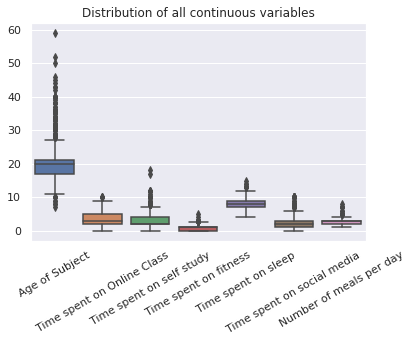

In [19]:
#PySpark doesn't provide as extensive plotting capabilities as Pandas and Matplotlib
#So could not use pyspark to create the bar chart
import seaborn as sns
sns.boxplot(data=dfpd)
plt.title('Distribution of all continuous variables')
plt.xticks(rotation=30)
plt.show()

# Step 3: Data Preparation. For step 3, we will use Python (issues identified in the previous iteration that should be addressed) and PySpark (couldn't identify those issues efficiently when running equivalent functions) for consequent steps, which we will download the cleaned dataset then re-upload it for feature selection and perform data mining analysis.

In [ ]:
dfpd.info() #Pandas

In [ ]:
df2.show() #PySpark

In [ ]:
df2.printSchema() #PySpark

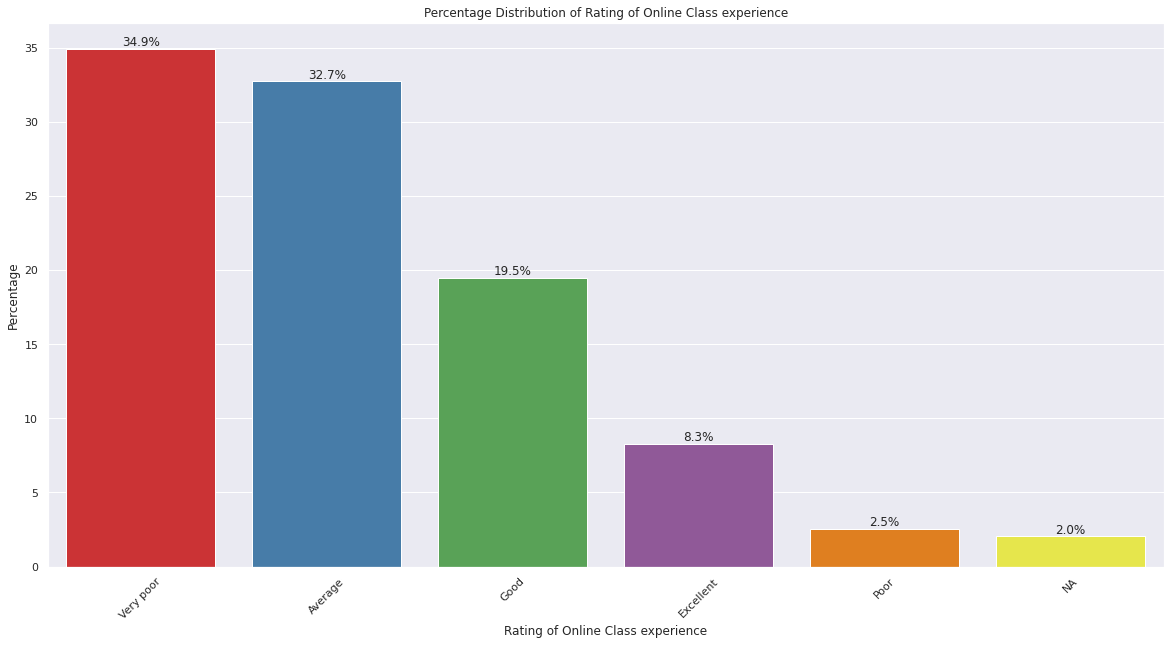

Very poor    413
Average      387
Good         230
Excellent     98
Poor          30
NA            24
Name: Rating of Online Class experience, dtype: int64


In [26]:
#Rating of Online Class experience
# Replace 'NaN' with 'NA' to ensure consistency in labeling
dfpd['Rating of Online Class experience'].replace('NA', 'NA', inplace=True)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=percentages.index, y=percentages.values, palette='Set1')
# Calculate percentages
total = len(dfpd)
counts = dfpd['Rating of Online Class experience'].value_counts()
percentages = counts / total * 100
# Create a bar plot for percentage distribution
for p, label in zip(ax.patches, percentages.values):
    height = p.get_height()
    ax.annotate(f'{label:.1f}%',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom')
plt.xlabel('Rating of Online Class experience')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Rating of Online Class experience')
plt.xticks(rotation=45) # Rotate x-axis labels for better visibility
plt.show()
print(dfpd['Rating of Online Class experience'].value_counts())

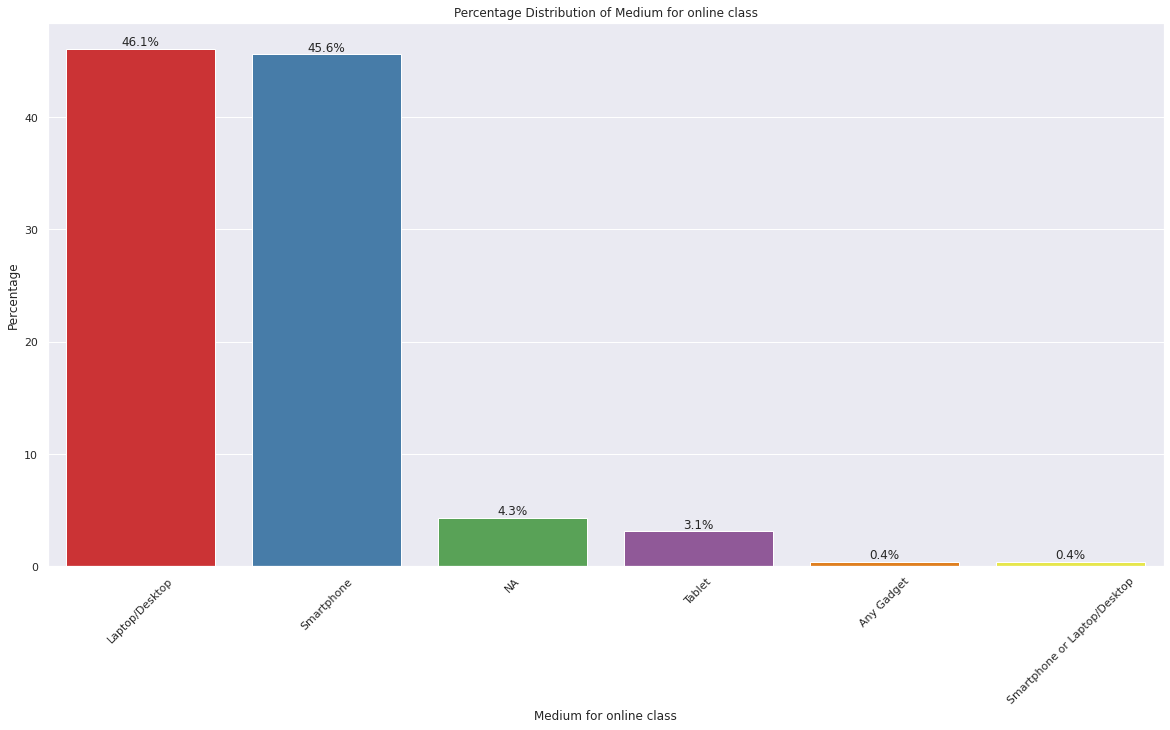

Laptop/Desktop                  545
Smartphone                      539
NA                               51
Tablet                           37
Any Gadget                        5
Smartphone or Laptop/Desktop      5
Name: Medium for online class, dtype: int64


In [23]:
#Medium for online class
# Replace 'NaN' with 'NA' to ensure consistency in labeling
dfpd['Medium for online class'].replace(np.nan, 'NA', inplace=True)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=percentages.index, y=percentages.values, palette='Set1')
# Calculate percentages
total = len(dfpd)
counts = dfpd['Medium for online class'].value_counts()
percentages = counts / total * 100
# Create a bar plot for percentage distribution
for p, label in zip(ax.patches, percentages.values):
    height = p.get_height()
    ax.annotate(f'{label:.1f}%',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom')
plt.xlabel('Medium for online class')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Medium for online class')
plt.xticks(rotation=45) # Rotate x-axis labels for better visibility
plt.show()
print(dfpd['Medium for online class'].value_counts())

In [29]:
#Reclassifying Time spent on TV
replacing_map = {'Time spent on TV': {'n': '0', 'N': '0', 'No tv': '0', ' ': '0',}}
dfpd.replace(replacing_map, inplace=True)
# unique_time = dfpd['Time spent on TV'].unique()
time_counts = dfpd['Time spent on TV'].value_counts()
#Print unique rows time
# print("Unique values of time spent on tv:")
# for time in unique_time:
#     print(time)
#Print counts of each unique rows of time
print("\nCounts of each unique time: ")
print(time_counts)


Counts of each unique time: 
0       454
1       306
2       207
0.5      78
3        50
4        24
1.5      14
0.3      12
5        10
6         9
0.1       4
4.5       2
7         2
8         2
2.5       2
0.25      1
0.6       1
15        1
0.75      1
3.5       1
0.4       1
Name: Time spent on TV, dtype: int64


Age of Subject: 10.204700
Time spent on Online Class: 6.288096
Time spent on self study: 0.230690
Time spent on fitness: 0.009673
Time spent on sleep: 0.033887
Time spent on social media: 2.998894
Number of meals per day: 0.152014
Rating of Online Class experience_Excellent: 1.660294
Rating of Online Class experience_Good: 0.512607
Rating of Online Class experience_Poor: 7.465568
Rating of Online Class experience_Very poor: 0.169172
Medium for online class_Laptop/Desktop: 1.193706
Medium for online class_Smartphone: 0.662810
Medium for online class_Smartphone or Laptop/Desktop: 3.532650
Medium for online class_Tablet: 1.337038
Prefered social media platform_Facebook: 4.816494
Prefered social media platform_Instagram: 0.006088
Prefered social media platform_Linkedin: 0.100716
Prefered social media platform_None: 0.463883
Prefered social media platform_None : 0.639390
Prefered social media platform_Omegle: 0.639390
Prefered social media platform_Quora: 1.563991
Prefered social media plat

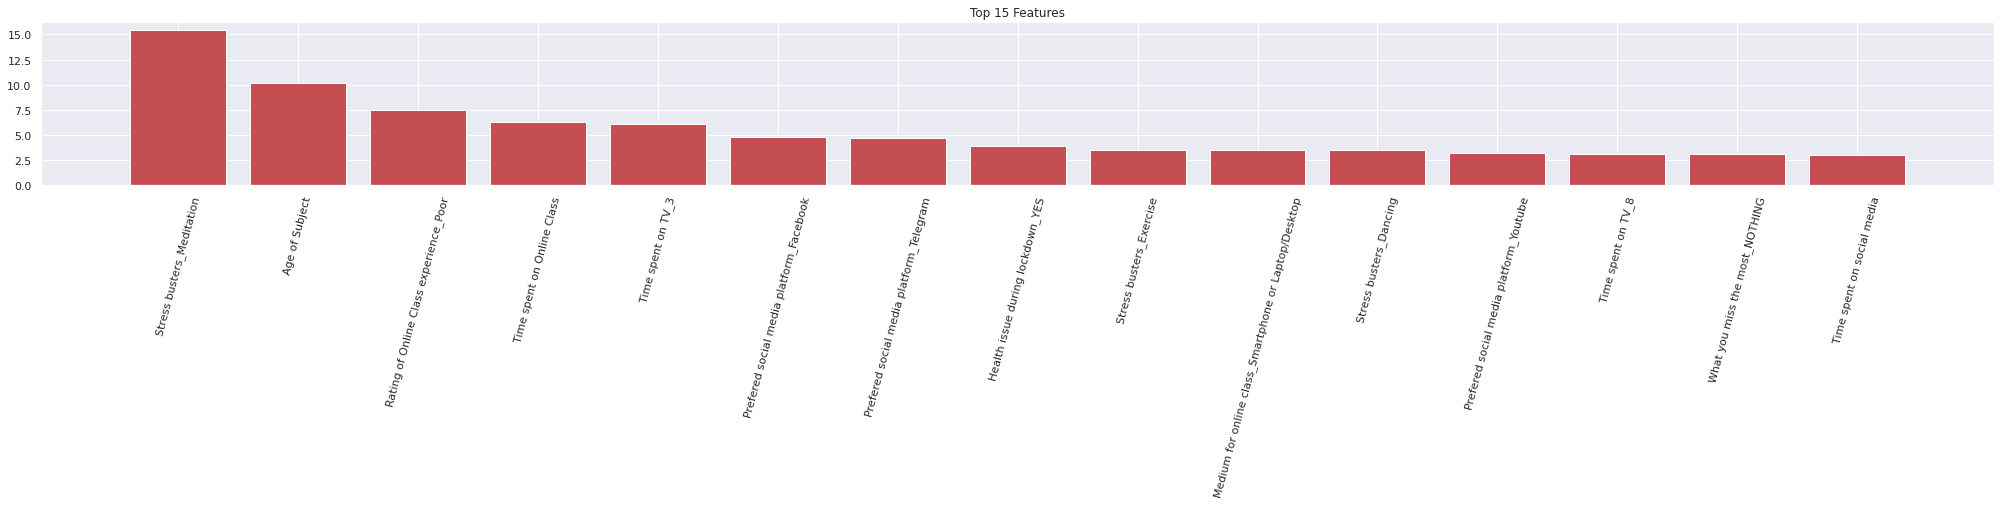

In [20]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# import numpy as np
# import pandas as pd

# # Extract the target variable
# y = dfpd["Region of residence"]

# # Drop the columns that won't be used as features
# drop_columns = ["ID", "Region of residence"]
# X = dfpd.drop(drop_columns, axis=1)

# # Perform one-hot encoding on categorical columns
# categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
# X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# # Produce and print scores for each feature using SelectKBest
# sf = SelectKBest(chi2, k='all')
# sf_fit = sf.fit(X_encoded, y)

# # Print feature scores
# for i in range(len(sf_fit.scores_)):
#     print('%s: %f' % (X_encoded.columns[i], sf_fit.scores_[i]))

# # Visualize the scores (you can adjust the number of features to display)
# import matplotlib.pyplot as plt

# indices = np.argsort(sf_fit.scores_)[::-1]
# top_features = 15  # Number of top features to display
# features = X_encoded.columns[indices[:top_features]]

# plt.figure(figsize=(35, 3))
# plt.bar(features, sf_fit.scores_[indices[:top_features]], color='r', align='center')
# plt.xticks(rotation=75)
# plt.title(f'Top {top_features} Features')
# plt.show()